In [83]:
from fredapi import Fred
import sys
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/API
    
econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

def get_FRED_data(FRED_series,
                  start_date,
                  API):
    '''
    This function downloads the econometric data from
    Federal Reserve Economic Data - FRED using an API
    '''
    if not(API):
        print('')
        print(' YOU DON''T HAVE A FRED API. THE FRED DATA'
          ' WILL NOT UPDATE UNTIL ONE IS PRESENT.'
          ' THERE ARE INSTRUCTIONS IN THE PRE-REQUISITES.')

    FRED_data = pd.DataFrame()
    FRED_data = fred.get_series(FRED_series, start_date)
    FRED_data.index = pd.to_datetime(FRED_data.index, format='%Y-%m-%d')

    return (FRED_data)

def plotly_time_series(df_labels,df_titles,df, font):
    count = 0
    d = {} #Empty dictionary to add values into
    list_dict_titles = list(df_titles.keys())
    list_dict = list(df_labels.keys())
    print(list_dict)
    for i in list_dict:
        d[count] = go.Scatter(x=df.index,
                           y=df[df_labels[i]['column_name']],
                           line=go.scatter.Line(color=df_labels[i]['color'], width = font*3),
                               opacity=0.8,
                               name=df_labels[i]['name'],
                               text=df_labels[i]['text'])
        count+=1
    layout = go.Layout(height=800, width=1400, font=dict(size=20),
                       title=df_titles['titles']['chart_title'],
                        yaxis=dict(title=df_titles['titles']['y_axis_title'], showspikes=True,
                                   fixedrange = False),
                       xaxis=dict(title=df_titles['titles']['x_axis_title'], showspikes=True,
                               rangeslider=dict(visible=True),
                               rangeselector=dict(
                               buttons=list([
                            dict(count=1, label="1m", step="month", stepmode="backward"),
                            dict(count=6, label="6m", step="month", stepmode="backward"),
                            dict(count=1, label="YTD", step="year", stepmode="todate"),
                            dict(count=1, label="1y", step="year", stepmode="backward"),
                            dict(count=6, label="5y", step="year", stepmode="backward"),
                            dict(step="all")
                    ]))))
    tot_temp = ''
    for i in range(len(d)):
        temp = 'd[' + str(i) + ']'
        comma = ','
        if i < len(d):
            tot_temp = tot_temp + temp + comma
        else:
            tot_temp = tot_temp + temp
    fig = go.Figure(data=eval(tot_temp), layout=layout)
    iplot(fig)
    
def difference(values, period):
    '''
    This function is a return and the specified period w/o
    considering total value. i.e. withdrawels/deposits
    '''
    # period=1
    diff_df = pd.DataFrame()
    diff_df = values
    diff_df = ((values - values.shift(period)) /
                 values.shift(period))
    diff_df = diff_df.dropna()
    return(diff_df)

# In the following I show a plotly graph of Annualized GDP 

['GDP']


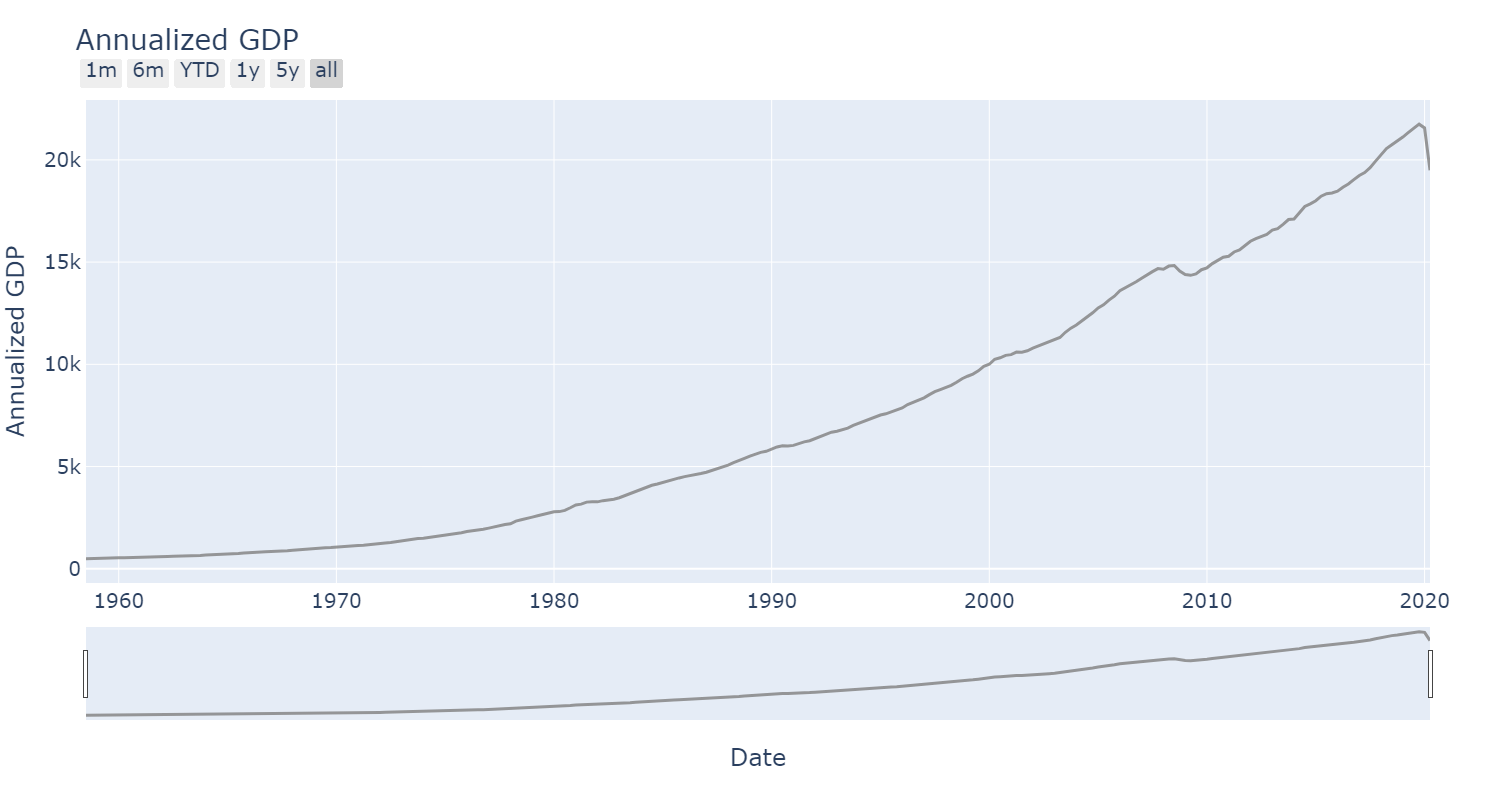

In [65]:

t1 = get_FRED_data('GDP',start_date = '1958-09-15',API = FRED_API_KEY)
t1 = t1.to_frame()
t1 = t1.rename(columns={t1.columns[0]: 'GDP'})
plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = t1, font = 1)


## Notice the exponential trend in the data so the data not stationary. This means that you can not statistically compare say 2011/10 data with 1970/71 because they woud have two different means and variances. Therefore you could not build a robust model across time. 

## One of the ways of modifying the data is by taking the difference.
$\begin{equation}\;Difference=:\;\Delta\;y\;\;=y_t\;-\;y_{t-1}\end{equation}$

                 GDP
1958-10-01  0.028227
1959-01-01  0.021569
1959-04-01  0.024147
1959-07-01  0.004556
1959-10-01  0.006792
...              ...
2019-04-01  0.010162
2019-07-01  0.009866
2019-10-01  0.009613
2020-01-01 -0.008564
2020-04-01 -0.096221

[247 rows x 1 columns]
                  GDP
1959-01-01  -0.235876
1959-04-01   0.119519
1959-07-01  -0.811340
1959-10-01   0.490898
1960-01-01   2.912852
...               ...
2019-04-01   0.034188
2019-07-01  -0.029068
2019-10-01  -0.025669
2020-01-01  -1.890918
2020-04-01  10.234875

[246 rows x 1 columns]
['GDP']


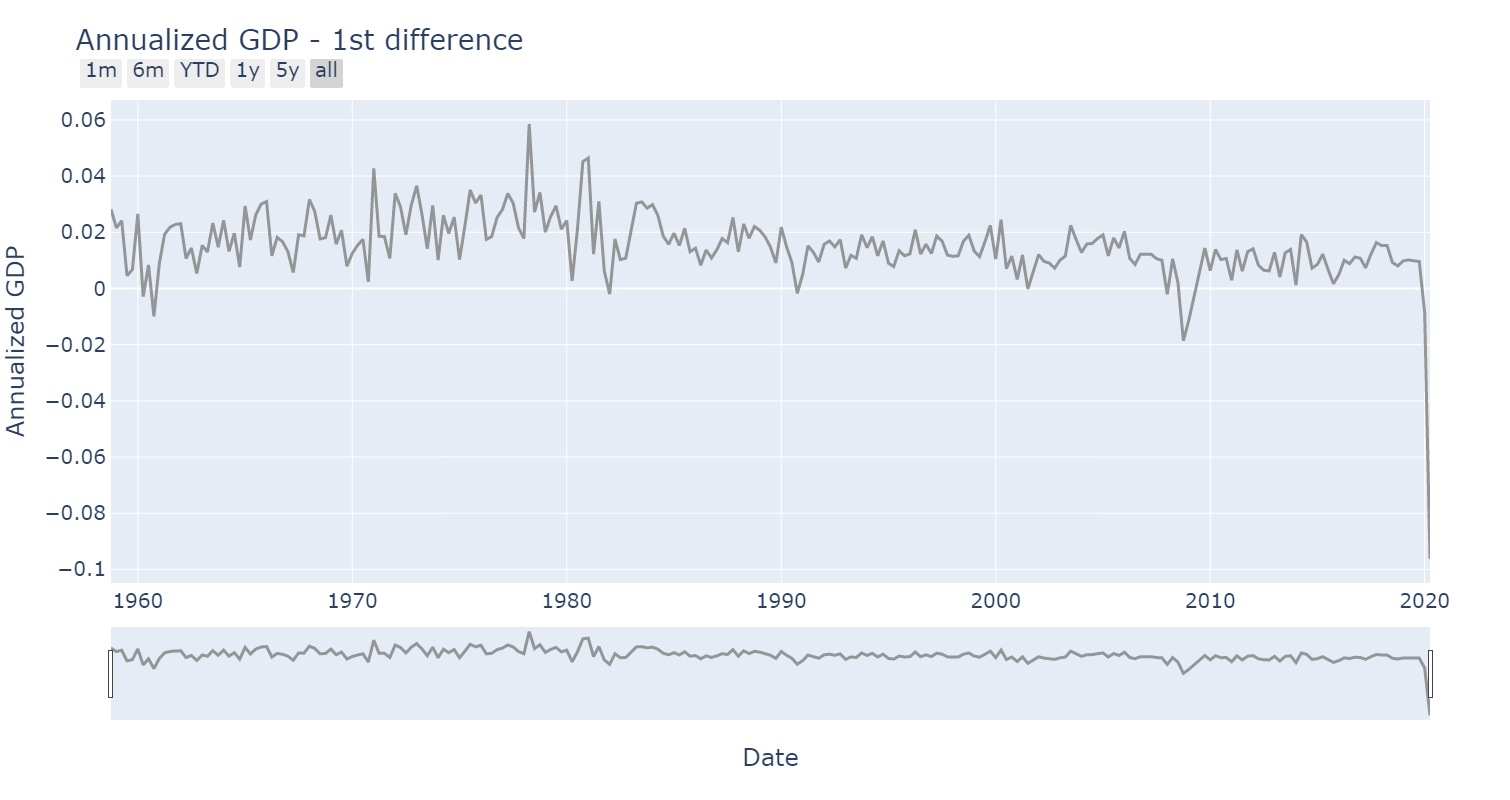

                  GDP
1959-01-01  -0.235876
1959-04-01   0.119519
1959-07-01  -0.811340
1959-10-01   0.490898
1960-01-01   2.912852
...               ...
2019-04-01   0.034188
2019-07-01  -0.029068
2019-10-01  -0.025669
2020-01-01  -1.890918
2020-04-01  10.234875

[246 rows x 1 columns]
['GDP']


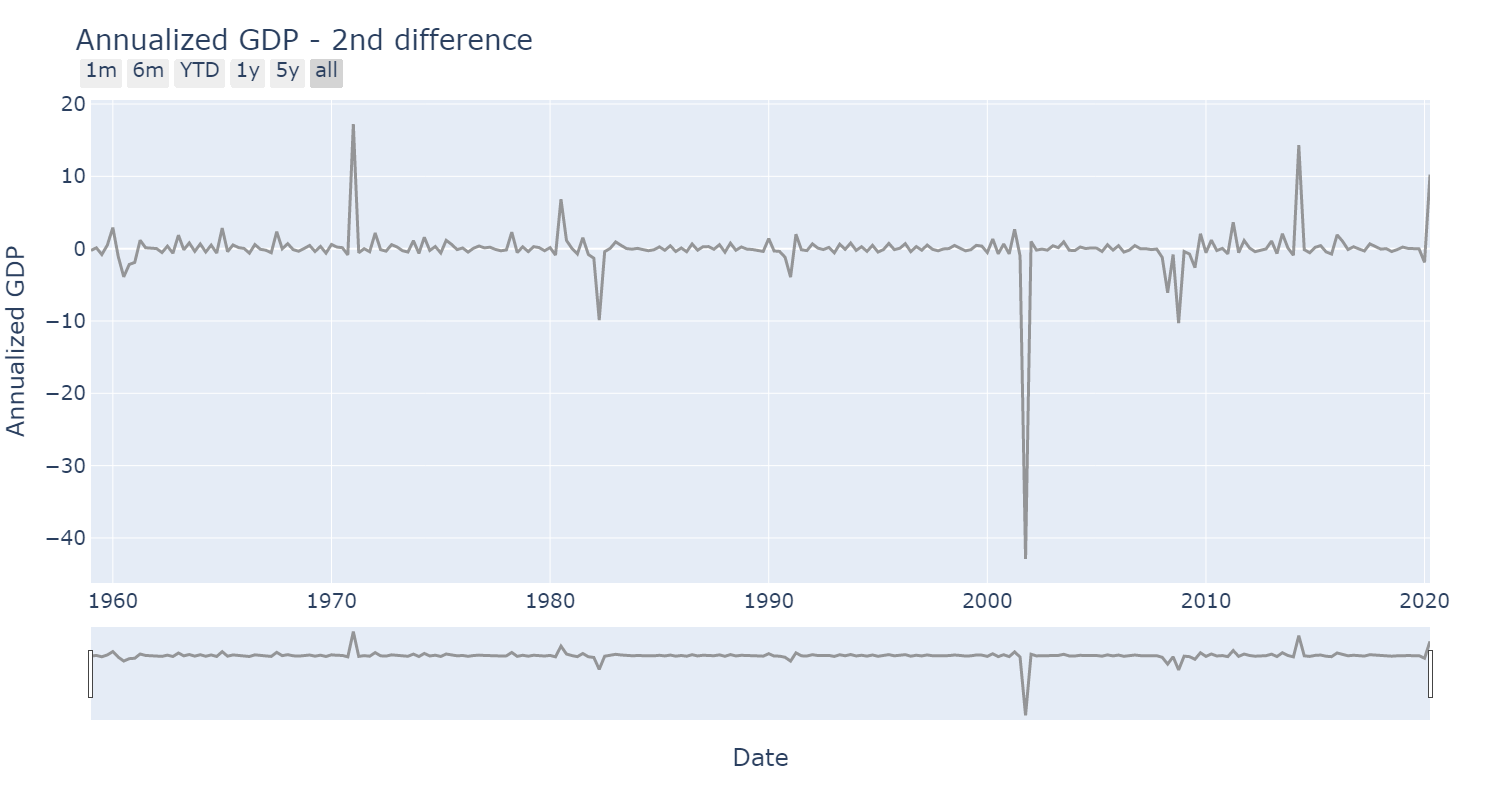

In [85]:
diff1 = difference(t1,1)
diff2 = difference(t1,1)
diff2 = difference(diff2,1)

print(diff1)

print(diff2)

econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP diff_1",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP - 1st difference',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = diff1, font = 1)

print(diff2)

econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP diff_2",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP - 2nd difference',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = diff2, font = 1)

## Viewing the charts above it seems the first and second differencing stabilized the data. But we can go further statistically analyzing the original, 1st, and 2nd difference by using the Augmented-Dickey Fuller tests.
## 

In [97]:
# Running the Augmented-Dickey Fuller test
t1_adf = adfuller(t1.values)
diff1_adf = adfuller(diff1.values)
diff2_adf = adfuller(diff2.values)

print('')
print('ADF Statistic: %f - Original data' % t1_adf[0])
print('ADF Statistic: %f - 1st diff' % diff1_adf[0])
print('ADF Statistic: %f - 2nd diff' % diff2_adf[0])
print('')
print('p-value %f - Original data' % t1_adf[1])
print('p-value %f - 1st diff' % diff1_adf[1])
print('p-value %f - 2nd diff' % diff2_adf[1])

print('')

print('Origrinal data - Critical values:')
for key, value in t1_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if t1_adf[0] < t1_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

print('')
print('1st diff - Critical values:')
for key, value in diff1_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if diff1_adf[0] < diff1_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('')
print('2nd diff - Critical values:')
for key, value in diff2_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if diff2_adf[0] < diff2_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -1.948500 - Original data
ADF Statistic: -2.386430 - 1st diff
ADF Statistic: -15.558325 - 2nd diff

p-value 0.309600 - Original data
p-value 0.145603 - 1st diff
p-value 0.000000 - 2nd diff

Origrinal data - Critical values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject Ho - Time Series is Non-Stationary

1st diff - Critical values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to Reject Ho - Time Series is Non-Stationary

2nd diff - Critical values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


## The ADF test yielded for the original and 1st differenced data failed or was greater than the critial values. The 2nd difference is stationary